In [ ]:
# uploading the images that I have chosen with their internet addresses
!wget "https://blogger.googleusercontent.com/img/a/AVvXsEh1cKiC-aTS4I_PfTncev0mdksTpetxM14UmKWWaTaNRe7kkV6V5llYra-rWpcCFg2-TL7TOqhPY0DTIK7WsWwfUSkFnOhSUf2et-uEdUmTKBtGh93IeH9WEX0Dp6DtHYfBbgjtDFvBm4ShzDktFGQhHgUseunKvxiDG4D5T_jXFg-DpmkEiQu_6kfOAA"
!wget "https://blogger.googleusercontent.com/img/a/AVvXsEjRUP7EatLIKdyU3CzEzyDX7BB8uVe-CLAN2S0_l_GCXLCtqctbSg2w-U9vItQh0Vm2kp5wASBqaD9JXUcQKnCzswzJz7h9Og8ggLHVcMJ70_wmteNKO3z9_WWfPoqxz3R9Pqa8VrjyMblhuF6GeD0vCwO4ZTtsW6MUhYvzuv4x1KAsZOmWEYGwLAcfiQ"

--2023-05-05 06:44:53--  https://blogger.googleusercontent.com/img/a/AVvXsEh1cKiC-aTS4I_PfTncev0mdksTpetxM14UmKWWaTaNRe7kkV6V5llYra-rWpcCFg2-TL7TOqhPY0DTIK7WsWwfUSkFnOhSUf2et-uEdUmTKBtGh93IeH9WEX0Dp6DtHYfBbgjtDFvBm4ShzDktFGQhHgUseunKvxiDG4D5T_jXFg-DpmkEiQu_6kfOAA
Resolving blogger.googleusercontent.com (blogger.googleusercontent.com)... 172.253.122.132, 2607:f8b0:4004:c09::84
Connecting to blogger.googleusercontent.com (blogger.googleusercontent.com)|172.253.122.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154429 (151K) [image/png]
Saving to: ‘AVvXsEh1cKiC-aTS4I_PfTncev0mdksTpetxM14UmKWWaTaNRe7kkV6V5llYra-rWpcCFg2-TL7TOqhPY0DTIK7WsWwfUSkFnOhSUf2et-uEdUmTKBtGh93IeH9WEX0Dp6DtHYfBbgjtDFvBm4ShzDktFGQhHgUseunKvxiDG4D5T_jXFg-DpmkEiQu_6kfOAA’

AVvXsEh1cKiC-aTS4I_ 100%[===================>] 150.81K  --.-KB/s    in 0.03s   

2023-05-05 06:44:54 (4.89 MB/s) - ‘AVvXsEh1cKiC-aTS4I_PfTncev0mdksTpetxM14UmKWWaTaNRe7kkV6V5llYra-rWpcCFg2-TL7TOqhPY0DTIK7WsWwfUSkFnOhSUf2e

In [ ]:
# importing the needed classes to show and process the images
import cv2
from matplotlib import pyplot as plt

# reading input1 image
input1 = cv2.imread("AVvXsEh1cKiC-aTS4I_PfTncev0mdksTpetxM14UmKWWaTaNRe7kkV6V5llYra-rWpcCFg2-TL7TOqhPY0DTIK7WsWwfUSkFnOhSUf2et-uEdUmTKBtGh93IeH9WEX0Dp6DtHYfBbgjtDFvBm4ShzDktFGQhHgUseunKvxiDG4D5T_jXFg-DpmkEiQu_6kfOAA")
input1 = cv2.cvtColor(input1, cv2.COLOR_BGR2GRAY)          # converting it from BGR to GRAY

# reading template image
template = cv2.imread("AVvXsEjRUP7EatLIKdyU3CzEzyDX7BB8uVe-CLAN2S0_l_GCXLCtqctbSg2w-U9vItQh0Vm2kp5wASBqaD9JXUcQKnCzswzJz7h9Og8ggLHVcMJ70_wmteNKO3z9_WWfPoqxz3R9Pqa8VrjyMblhuF6GeD0vCwO4ZTtsW6MUhYvzuv4x1KAsZOmWEYGwLAcfiQ")
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)    # converting it from BGR to GRAY

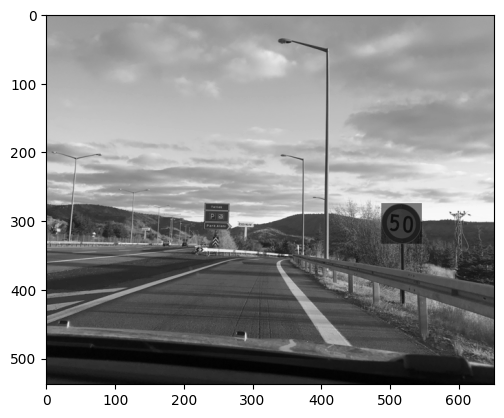

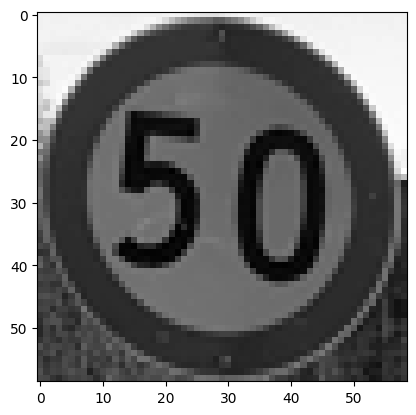

In [ ]:
plt.imshow(input1, cmap = "gray")                   # showing the input image on the screen
plt.show()

plt.imshow(template, cmap = "gray")                # showing the template image on the screen
plt.show()

In [ ]:
def calculateMean(im):        # this method helps to calculate the mean of the parameter image
  i = 0
  j = 0
  sum = 0
  result = 0

  while(i < len(im)):           # calculating the sum of pixel values
    while(j < len(im[0])):
      sum += im[i][j]
      j += 1
    i += 1
    j = 0

  result = sum /(len(im) * len(im[0]))    # dividing the sum with the height and width of the image
  return result                         #returning the result


In [ ]:
def newP(P, T):     # reshapes the image given in the parameter
  x = len(P)
  y = len(P[0])
  i = (len(T)-1)//2
  j = (len(T[0])-1)//2
  newP = P[i:x-i,j:y-j]
  return newP

In [ ]:
# importing the needed classes to process the images
import numpy as np

# this method calculates the correlation measure and prints it
# then it finds the highest pixel values and shows it on the image in a rectangle shape
def correlationMeasure(P,T):
  img = P.copy()
  P = np.float64(P)                   # converting images to float64 datatype
  T = np.float64(T)
  nP = newP(P,T)                      # reshape the main image
  result = cv2.filter2D(src = nP, ddepth=-1, kernel=T)   # calculates the correlation measure by filtering the image by the template
  plt.imshow(result, cmap = 'jet')                      # show the correlation measure
  plt.title('Correlation')
  plt.colorbar()
  plt.show()

  w, h = T.shape[::-1]
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)    # find the location of maximum & minimum values
  top_left = max_loc                                            # since correlation is a similarity measure choose max value's location
  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv2.rectangle(img,top_left, bottom_right, 0, 2)         # draw the rectangle on the image
  plt.imshow(img,cmap = 'gray')                           # and print it
  plt.title('Detected Point')
  plt.show()

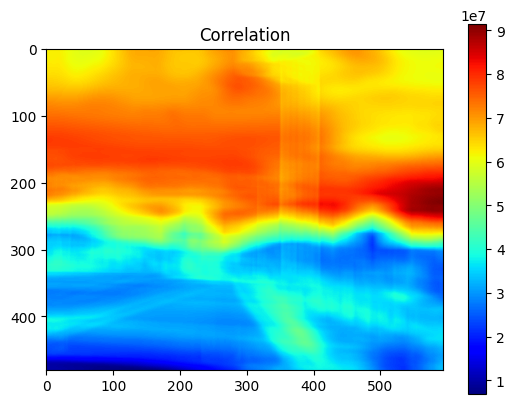

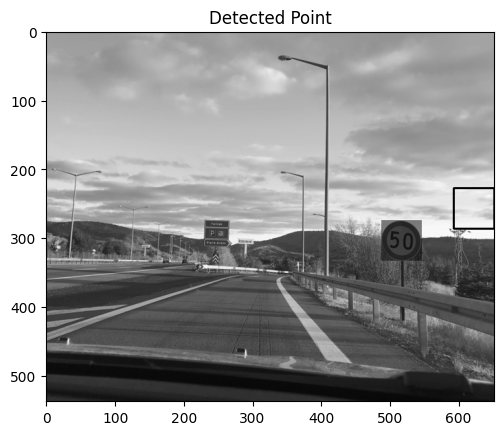

In [ ]:
correlationMeasure(input1, template)    # call correlation measure method

In [ ]:
# this method calculates the zero mean correlation measure and prints it
# then it finds the highest pixel values and shows it on the image in a rectangle shape
def zeroMeanCorrelationMeasure(P,T):
  img = P.copy()
  P = np.float64(P)             # converting images to float64 datatype
  T = np.float64(T)

  tmean = calculateMean(T)      # calculates mean of image T
  T = T - tmean                 # calculates new T by substracting its mean from it

  nP = newP(P,T)                # reshape the main image
  result = cv2.filter2D(src = nP, ddepth=-1, kernel=T)   # calculates the zero mean correlation measure by filtering the image by the template
  plt.imshow(result, cmap = 'jet')                      # show the zero mean correlation measure
  plt.title('Zero Mean Correlation')
  plt.colorbar()
  plt.show()

  w, h = T.shape[::-1]
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)    # find the location of maximum & minimum values
  top_left = max_loc                                            # since correlation is a similarity measure choose max value's location
  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv2.rectangle(img,top_left, bottom_right, 0, 2)         # draw the rectangle on the image
  plt.imshow(img,cmap = 'gray')                           # and print it
  plt.title('Detected Point')
  plt.show()

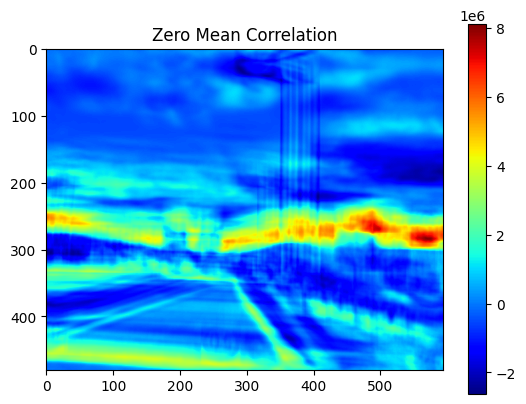

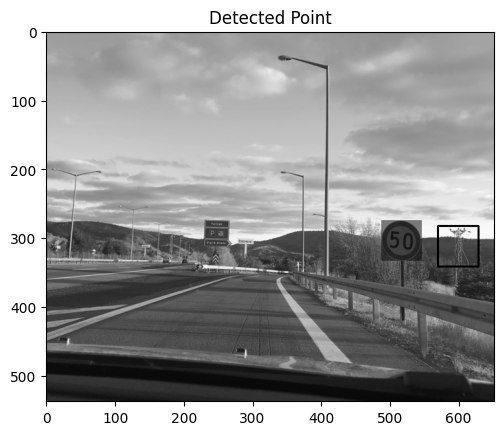

In [ ]:
zeroMeanCorrelationMeasure(input1,template)    # call zero mean correlation measure method

In [ ]:
def ssdMeasure(P, T):                    # computes SSD between P and T that are same size
    P = P.astype(np.float64)             # converting images to float64 datatype
    T = T.astype(np.float64)

    ssd = np.sum((P - T) ** 2)           # compute SSD between P and T
    return ssd

In [ ]:
def sumOfSquaredDifferenceMeasure(P, T):
    img = P.copy()

    input_height, input_width = P.shape                 # get size of input and template images
    template_height, template_width = T.shape

    result = np.zeros_like(P, dtype=np.float64)         # initialize output image

    margin_y = template_height // 2                       # define the region where we will compare the input image and the template
    margin_x = template_width // 2


    for y in range(margin_y, input_height - margin_y):
        for x in range(margin_x, input_width - margin_x):
            Pi = P[y - margin_y : y + margin_y + 1, x - margin_x : x + margin_x + 1]    # get the patch of the input image that corresponds to the template
            val = ssdMeasure(Pi, T)                                                     # compute SSD between P and T
            result[y, x] = val                                                      # set the corresponding pixel in the output image

    result = (result - np.min(result)) / (np.max(result) - np.min(result))    # normalize output image to be in the range [0, 1]

    result = (result * 255).astype(np.uint8)    # convert output image to 8-bit unsigned integer
    nP = newP(result,T)                             # reshape the output image

    plt.imshow(nP, cmap = 'jet')                      # show the sum of squared difference measure
    plt.title("Sum of Squared Difference")
    plt.colorbar()
    plt.show()

    w, h = T.shape[::-1]
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(nP)    # find the location of minimum values
    top_left = min_loc                                  # since correlation is a dissimilarity measure choose min value's location
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 0, 2)         # draw the rectangle on the image
    plt.imshow(img,cmap = 'gray')                           # and print it
    plt.title('Detected Point')
    plt.show()

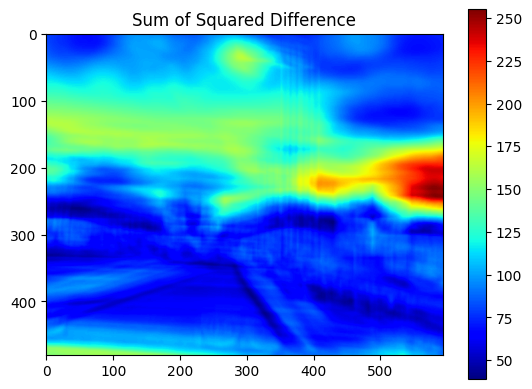

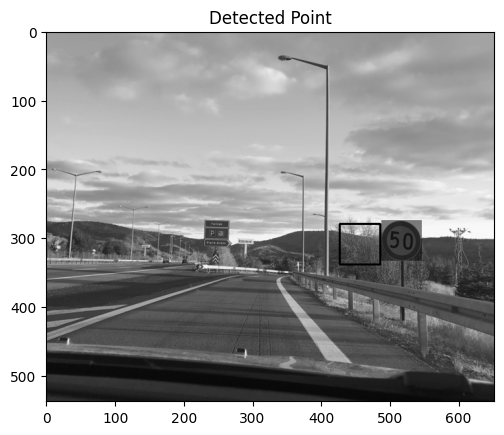

In [ ]:
sumOfSquaredDifferenceMeasure(input1, template)

In [ ]:
import math
def stdForNcc(im,mim):      #calculates the standard deviation of the given image and the mean of the image as a parameter
  i = 0
  j = 0
  sum = 0

  while(i < len(im)):
    while(j < len(im[0])):
      sub = abs(im[i][j]- mim)
      sum += math.pow((sub),2)
      j += 1
    i += 1
    j = 0

  sum = math.pow(sum,0.5)
  return sum

In [ ]:
def normalizedCrossCorrelationMeasure(P,T):
  img = P.copy()
  nP = newP(P,T)
  P = np.float64(nP)             # converting images to float64 datatype
  T = np.float64(T)
  tmean = calculateMean(T)      # calculates mean of image T
  sumt = stdForNcc(T, tmean)    # calculates standard deviation of image T

  T = T - tmean
  T_norm = T / (sumt)         # calculates normalized version of image T

  pmean = calculateMean(P)      # calculates mean of image P
  sump = stdForNcc(P, pmean)    # calculates standard deviation of image P

  P = P - pmean
  P_norm = P / (sump)         # calculates normalized version of image P

  result = cv2.filter2D(src = P_norm, ddepth=-1, kernel=T_norm)   # calculates the normalized cross correlation measure by filtering the image by the template

  result = (result )/(sumt*sump)         # calculates normalized version of resulting image

  plt.imshow(result, cmap = 'jet')                      # show the result
  plt.title('Normalized Cross-Correlation')
  plt.colorbar()
  plt.show()

  w, h = T.shape[::-1]
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)    # find the location of maximum & minimum values
  top_left = max_loc                                           # since ncc is a similarity measure choose max value's location
  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv2.rectangle(img,top_left, bottom_right, 0, 2)         # draw the rectangle on the image
  plt.imshow(img,cmap = 'gray')                           # and print it
  plt.title('Detected Point')
  plt.show()

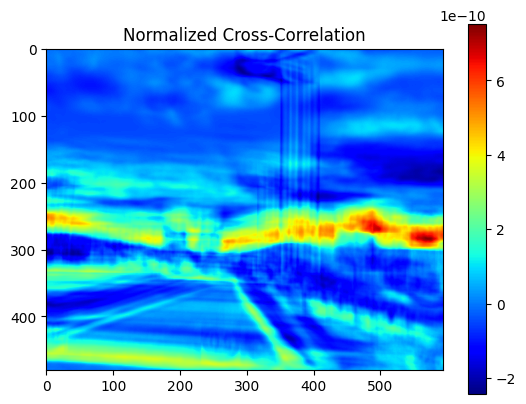

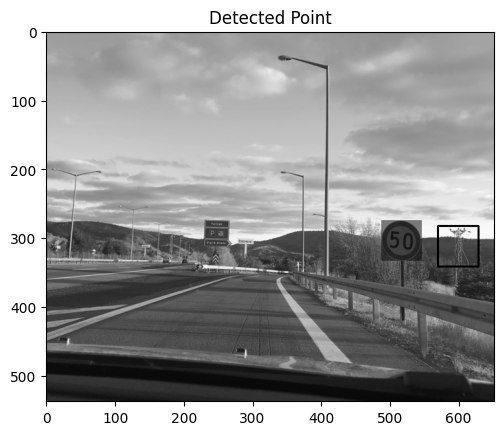

In [ ]:
normalizedCrossCorrelationMeasure(input1, template)